In [108]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [109]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,
                  random_state=0)

In [110]:
# Checking for missing values
print(data.isnull().sum())

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state=42)

In [112]:
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters = k,init="k-means++")
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

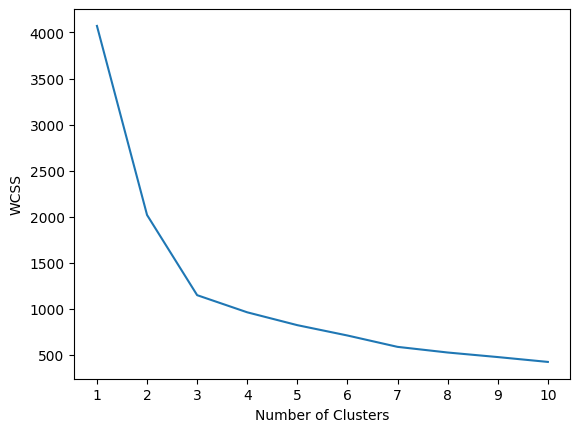

In [113]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [114]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [115]:
y_labels = kmeans.fit_predict(X_train)
y_test_label =kmeans.predict(X_test)

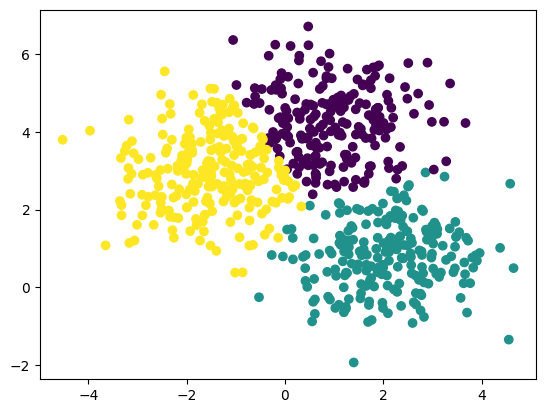

In [116]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

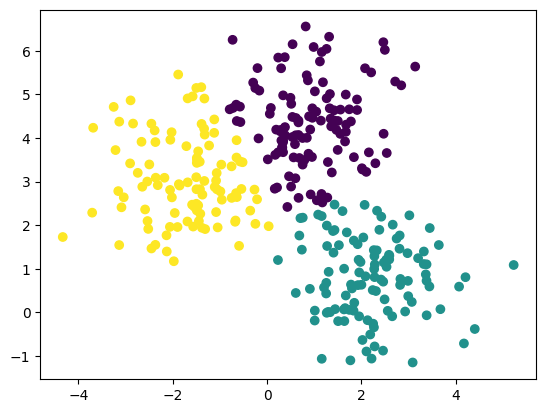

In [117]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label)

In [118]:
!pip install kneed

In [119]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve='convex',direction = 'decreasing')
kl.elbow

3

In [120]:
from sklearn.metrics import silhouette_score

In [121]:
#silhouette score
silhouette_coefficients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X_train)
  score=silhouette_score(X_train,kmeans.labels_)
  silhouette_coefficients.append(score)

In [122]:
silhouette_coefficients

[0.4637700375561245,
 0.4684575687250344,
 0.3993413060830648,
 0.3400876133906997,
 0.3266370001414992,
 0.3312929836938034,
 0.3416233271505729,
 0.3271446161435391,
 0.34180174880794695]